In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
submit = pd.read_csv("sample_submission.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
submit.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,.,.
3,.,.
4,CR_196089,1


In [5]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [6]:
train.shape

(23856, 18)

In [7]:
test.shape

(15903, 17)

In [8]:
train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

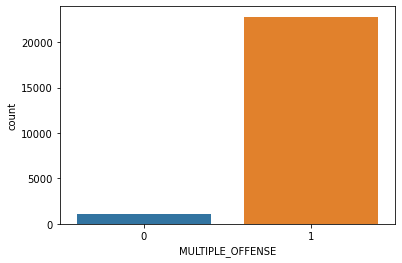

In [9]:
#Counting No of zero and one









sns.countplot(x="MULTIPLE_OFFENSE", data = train)

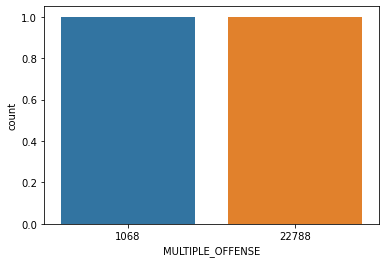

In [10]:
sns.countplot(train.MULTIPLE_OFFENSE.value_counts())

In [11]:
X = train.drop(['MULTIPLE_OFFENSE', 'DATE', 'INCIDENT_ID'],axis=1)
eval_X = test.drop(['DATE','INCIDENT_ID'],axis=1)
Y = train['MULTIPLE_OFFENSE']

In [12]:
X.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    182
X_13      0
X_14      0
X_15      0
dtype: int64

In [13]:
X = X.fillna(X.mean())

In [14]:
X.isnull().sum()

X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [17]:
#Neighbors are selected 5 to take the shortest distance to identify the category of the datapoint
#p=2 means euclid distance formula is used 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [18]:
Y_pred = clf.predict(X_test)

In [19]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
Y_pred_train = clf.predict(X_train)

In [21]:
Y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(Y_test,Y_pred)
cm_train = confusion_matrix(Y_train,Y_pred_train)

In [23]:
cm_train

array([[  289,   511],
       [   32, 17060]], dtype=int64)

In [24]:
cm_test

array([[  57,  211],
       [  21, 5675]], dtype=int64)

In [25]:
from sklearn.metrics import f1_score
print("Test F1 score")
print(f1_score(Y_test, Y_pred))

Test F1 score
0.9799689172854429


In [26]:
print("Train F1 score")
print(f1_score(Y_train, Y_pred_train))

Train F1 score
0.9843348815740126


In [27]:
#Using SVM
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,Y_train)

SVC(random_state=0)

In [28]:
Y_pred_SVM = classifier.predict(X_test)

In [29]:
CM_SVM = confusion_matrix( Y_test,Y_pred_SVM)

In [30]:
CM_SVM

array([[ 132,  136],
       [  18, 5678]], dtype=int64)

In [31]:
print("Test F1 score by SVM")
print(f1_score(Y_test, Y_pred_SVM))

Test F1 score by SVM
0.9866203301476977


In [32]:
Y_pred_train_SVM = classifier.predict(X_train)

In [33]:
CM_SVMtrain = confusion_matrix(Y_train,Y_pred_train_SVM)
CM_SVMtrain

array([[  397,   403],
       [   28, 17064]], dtype=int64)

In [34]:
print("Train F1 score by SVM")
print(f1_score(Y_train, Y_pred_train_SVM))

Train F1 score by SVM
0.9875285743221737


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
Y_pred_DTC = classifier1.predict(X_test)
Y_pred_DTC

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [37]:
Y_pred_DTCtrain = classifier1.predict(X_train)
Y_pred_DTCtrain

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
cm_DTC = confusion_matrix(Y_test, Y_pred_DTC)
cm_DTC

array([[ 264,    4],
       [   7, 5689]], dtype=int64)

In [39]:
cm_DTCtrain = confusion_matrix(Y_train,Y_pred_DTCtrain)
cm_DTCtrain

array([[  800,     0],
       [    0, 17092]], dtype=int64)

In [40]:
print("Test F1 score by Decission Tree")
print(f1_score(Y_test,Y_pred_DTC))

Test F1 score by Decission Tree
0.999034155764334


In [41]:
print("Train F1 score by Decission Tree")
print(f1_score(Y_train,Y_pred_DTCtrain))

Train F1 score by Decission Tree
1.0


In [ ]:
#Working On Test Data

In [173]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [174]:
test.shape

(15903, 17)

In [175]:
X_Final = test.drop(['DATE', 'INCIDENT_ID'],axis=1)

In [176]:
X_Final.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [177]:
X_Final.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    127
X_13      0
X_14      0
X_15      0
dtype: int64

In [178]:
X_Final = X.fillna(X_Final.mean())

In [179]:
X_Final.isnull().sum()

X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
dtype: int64

In [193]:
Y_Final = classifier1.predict(X_Final)

In [194]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [195]:
Y_Pred = test["INCIDENT_ID"]

In [196]:
Y_Final=pd.DataFrame(Y_Final)

In [197]:
type(Y_Final)
Y_Final.head()

,0
0,0
1,0
2,0
3,0
4,0


In [198]:
Y_Pred = pd.DataFrame(Y_Pred)

In [199]:
type(Y_Pred)
Y_Pred.head()

,INCIDENT_ID
0,CR_195453
1,CR_103520
2,CR_196089
3,CR_112195
4,CR_149832


In [200]:
Y_Final.columns

RangeIndex(start=0, stop=1, step=1)

In [201]:
Y_Final.columns = ['MULTIPLE_OFFENSE']

In [202]:
Y_Final.head()

,MULTIPLE_OFFENSE
0,0
1,0
2,0
3,0
4,0


In [203]:
Final = pd.concat([Y_Pred, Y_Final], axis=1)

In [204]:
Final

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,0
1,CR_103520,0
2,CR_196089,0
3,CR_112195,0
4,CR_149832,0
5,CR_81654,1
6,CR_139009,0
7,CR_6108,0
8,CR_62283,0
9,CR_5710,0


In [205]:
Final.to_csv (r'C:\Users\Lenovo\Desktop\Dataset\export_dataframe.csv', index = False)